# Data 201A Final Project
## Run Yu
### Data: Land Use in San Francisco 2016

In [294]:
import numpy as np
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Variables Description
CIE = Cultural, Institutional, Educational
MED = Medical
MIPS = Office (Management, Information, Professional Services)
MIXED = Mixed Uses (Without Residential)
MIXRES = Mixed Uses (With Residential)
PDR = Industrial (Production, Distribution, Repair)
RETAIL/ENT = Retail, Entertainment
RESIDENT = Residential
VISITOR = Hotels, Visitor Services
VACANT = Vacant
ROW = Right-of-Way
OPENSPACE = Open Space

Other attributes are:
RESUNITS = Residential Units
BLDGSQFT = Square footage data
YRBUILT = year built
TOTAL_USES = Business points from Dun & Bradstreet were spatially aggregated to the closest parcel, and this field is the sum of the square footage fields
The subsequent fields (CIE, MED, MIPS, RETAIL, PDER & VISITOR) were derived using the NAICS codes supplied in the Dun & Bradstreet dataset, and the previous TOTAL_USES column.

The determining factor for a parcel's LANDUSE is if the square footage of any non-residential use is 80% or more of its total uses. Otherwise it becomes MIXED.

In the case where RESIDENT use has some square footage of non-residential use, this is mainly accessory uses such as home businesses, freelancers, etc.

In [295]:
with open('./LandUse2016.csv', 'r') as readFile: 
    with open('./CleanedLandUse2016.csv','w') as writeFile:
        sf_landuse_2016 = pd.read_csv(readFile)
        print(sf_landuse_2016.columns)
        sf_landuse_2016 = sf_landuse_2016.drop(['BLKLOT', 'the_geom', 'MAPBLKLOT', 'BLOCK_NUM', 'LOT_NUM',
       'FROM_ST', 'TO_ST','ST_TYPE','SHAPE_Leng','BLDGSQFT'],axis=1)
        print(sf_landuse_2016.columns)
        sf_landuse_2016.to_csv(writeFile,index=False)


Index(['OBJECTID', 'BLKLOT', 'the_geom', 'MAPBLKLOT', 'BLOCK_NUM', 'LOT_NUM',
       'FROM_ST', 'TO_ST', 'STREET', 'ST_TYPE', 'RESUNITS', 'BLDGSQFT',
       'YRBUILT', 'TOTAL_USES', 'LANDUSE', 'CIE', 'MED', 'MIPS', 'RETAIL',
       'PDR', 'VISITOR', 'SHAPE_Leng', 'SHAPE_Area'],
      dtype='object')
Index(['OBJECTID', 'STREET', 'RESUNITS', 'YRBUILT', 'TOTAL_USES', 'LANDUSE',
       'CIE', 'MED', 'MIPS', 'RETAIL', 'PDR', 'VISITOR', 'SHAPE_Area'],
      dtype='object')


In [296]:
sf_landuse_2016 = pd.read_csv('./CleanedLandUse2016.csv')
sf_landuse_2016

,OBJECTID,STREET,RESUNITS,YRBUILT,TOTAL_USES,LANDUSE,CIE,MED,MIPS,RETAIL,PDR,VISITOR,SHAPE_Area
0,1,BAY,5,1912,0,RESIDENT,0,0,0,0,0,0,3864.061762
1,2,BAY,1,1900,3471,MIXRES,0,0,3471,0,0,0,3361.025351
2,3,BAY,2,1900,0,RESIDENT,0,0,0,0,0,0,3272.033196
3,4,BAY,2,1940,0,RESIDENT,0,0,0,0,0,0,4570.767667
4,5,BAY,2,1938,0,RESIDENT,0,0,0,0,0,0,5225.823735
5,6,LARKIN,3,1900,0,RESIDENT,0,0,0,0,0,0,2699.413653
6,7,UNKNOWN,0,0,20509,VACANT,0,0,2455,18054,0,0,31183.392188
7,8,JEFFERSON,0,1900,43725,PDR,0,0,0,43725,0,0,69014.270707
8,9,JEFFERSON,0,1900,28728,PDR,0,0,0,28728,0,0,106916.225315
9,10,HYDE,0,1900,16214,OpenSpace,0,0,0,16214,0,0,115105.815832


# Land Use Categories Pie Chart

LANDUSE
CIE               1367
MED                213
MIPS              1352
MISSING DATA      1985
MIXED             1939
MIXRES           22826
OpenSpace          932
PDR               2090
RESIDENT        115169
RETAIL/ENT        2726
Right of Way         3
VACANT            4593
VISITOR            273
dtype: int64


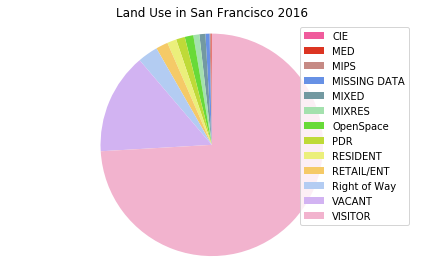

In [297]:
landuse_df = sf_landuse_2016.groupby('LANDUSE').size()
print(landuse_df)
landuse_labels = [i for i in departments_total.keys()]
landuse_sizes = [departments_total.iloc[j] for j in range(len(departments_total))]
landuse_sizes.sort()
landuse_colors = ['#F05B9C','#DC3522','#C68A84','#6791E5','#7399A1','#A4E1AE','#68DA38',
                  '#BFDA38','#EBEF7B','#F5CA67','#B3CCF2','#D2B3F2','#F2B3CE']
 
landuse_fig, landuse_ax = plt.subplots()
patches, texts = landuse_ax.pie(landuse_sizes, colors = landuse_colors, startangle=90)
plt.legend(patches, landuse_labels, loc="best")
for text in texts:
    text.set_color('grey')
landuse_ax.axis('equal') 
landuse_ax.set_title('Land Use in San Francisco 2016')
plt.tight_layout()
plt.show()

# Land Use Development 1986-2016 Plot

In [298]:
# Choose the year range from 1986 to 2016
sf_landuse_2016_develop = sf_landuse_2016.copy()
sf_landuse_2016_develop['YRBUILT'] = sf_landuse_2016_develop['YRBUILT'].where(sf_landuse_2016_develop['YRBUILT']>= 1986)
sf_landuse_2016_develop['YRBUILT'] = sf_landuse_2016_develop['YRBUILT'].where(sf_landuse_2016_develop['YRBUILT']<= 2016)                                                                      
sf_landuse_2016_develop['YRBUILT'].describe()

count    6526.000000
mean     1996.134232
std         7.630554
min      1986.000000
25%      1989.000000
50%      1996.000000
75%      2001.000000
max      2016.000000
Name: YRBUILT, dtype: float64

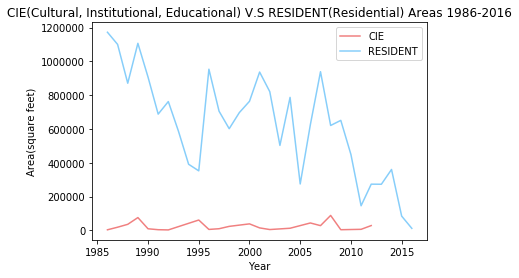

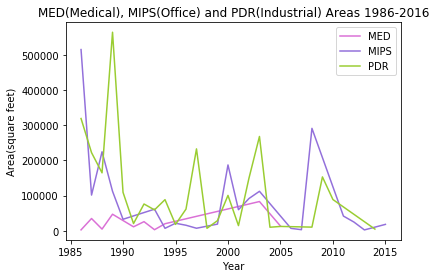

In [299]:
def plot_tool(landtype,markercolor,data_source,in_ax):
    plot_data = data_source.loc[(data_source['LANDUSE'] == landtype)] \
                    .groupby(['YRBUILT'],as_index=False)[['SHAPE_Area']].sum()
    in_ax.plot(plot_data['YRBUILT'],
        plot_data['SHAPE_Area'],
        linestyle='-',
        color=markercolor)
    
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)
plot_tool('CIE', 'lightcoral', sf_landuse_2016_develop,ax)
plot_tool('RESIDENT', 'lightskyblue', sf_landuse_2016_develop,ax)
ax.set_title('CIE(Cultural, Institutional, Educational) V.S RESIDENT(Residential) Areas 1986-2016')
ax.set_xlabel('Year')
ax.set_ylabel('Area(square feet)')
plt.legend(['CIE','RESIDENT'])

fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
plot_tool('MED', 'orchid', sf_landuse_2016_develop,ax2)
plot_tool('MIPS', 'mediumpurple', sf_landuse_2016_develop,ax2)
plot_tool('PDR', 'yellowgreen', sf_landuse_2016_develop,ax2)
ax2.set_title('MED(Medical), MIPS(Office) and PDR(Industrial) Areas 1986-2016')
ax2.set_xlabel('Year')
ax2.set_ylabel('Area(square feet)')
plt.legend(['MED','MIPS','PDR'])
plt.show()

# Used Land Allocation Stacked Bar

In [300]:
used_land_allocation = sf_landuse_2016.copy()
used_land_allocation['TOTAL_USES'] = used_land_allocation['TOTAL_USES'].mask(used_land_allocation['TOTAL_USES']== 0)
used_land_allocation = used_land_allocation.dropna()

In [301]:
used_land_df = used_land_allocation.groupby(['LANDUSE'],as_index=False).sum()
used_land_df

,LANDUSE,OBJECTID,RESUNITS,YRBUILT,TOTAL_USES,CIE,MED,MIPS,RETAIL,PDR,VISITOR,SHAPE_Area
0,CIE,55492025,122,1525844,12081442.0,8705825,926227,1846970,371497,230498,425,5.438018e+07
1,MED,13197007,0,404664,4468298.0,101891,4058914,171467,119126,16900,0,1.689324e+06
2,MIPS,69460348,62,2166490,35897053.0,1725675,733855,31093252,1898099,357627,88545,1.172881e+07
3,MISSING DATA,6439483,0,23452,1221138.0,178436,116909,684079,118763,120181,2770,3.454412e+06
4,MIXED,111305443,0,3706037,50068594.0,6754249,5185471,21243250,9757687,6588987,538950,2.446733e+07
5,MIXRES,1474399768,114202,42227221,83778907.0,7694435,4944472,38480595,14619184,16684958,1355263,8.355202e+07
6,OpenSpace,7694556,877,129164,5678035.0,1177722,306502,2872269,641161,633278,47103,2.146047e+08
7,PDR,102352421,0,2252362,11303245.0,249574,117264,1475260,970075,8482441,8631,1.848724e+07
8,RESIDENT,63448508,36510,1404882,10295925.0,1214765,630572,5325076,1886012,1118696,120804,2.511023e+07
9,RETAIL/ENT,125720668,16,3780341,13094278.0,276032,240346,1223880,10422580,909072,22368,1.637172e+07


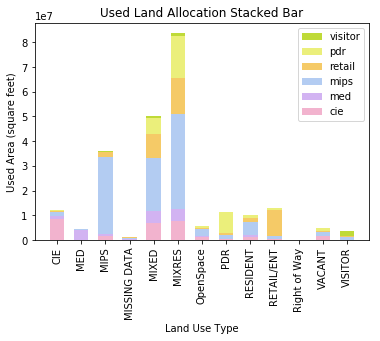

In [302]:
landuse_type = [i for i in used_land_df['LANDUSE'].unique()]
cie = used_land_df['CIE']
med = used_land_df['MED']
mips = used_land_df['MIPS']
retail = used_land_df['RETAIL']
pdr = used_land_df['PDR']
visitor = used_land_df['VISITOR']

plt.bar(landuse_type, visitor, width=0.6, label='visitor', color='#BFDA38', bottom=pdr+retail+mips+med+cie)
plt.bar(landuse_type, pdr, width=0.6, label='pdr', color='#EBEF7B', bottom=retail+mips+med+cie)
plt.bar(landuse_type, retail, width=0.6, label='retail', color='#F5CA67', bottom=mips+med+cie)
plt.bar(landuse_type, mips, width=0.6, label='mips', color='#B3CCF2', bottom=med+cie)
plt.bar(landuse_type, med, width=0.6, label='med', color='#D2B3F2', bottom=cie)
plt.bar(landuse_type, cie, width=0.6, label='cie', color='#F2B3CE')

plt.xticks(landuse_type,rotation='vertical')
plt.ylabel('Used Area (square feet)')
plt.xlabel('Land Use Type')
plt.legend(loc="upper right")
plt.title('Used Land Allocation Stacked Bar')
plt.show()

# Residential Area Development 2006-2016 Bar Plot 

In [303]:
# Choose the year range from 2006 to 2016
residental_develop = sf_landuse_2016.copy()
residental_develop['YRBUILT'] = residental_develop['YRBUILT'].where(residental_develop['YRBUILT']>= 2006)
residental_develop['YRBUILT'] = residental_develop['YRBUILT'].where(residental_develop['YRBUILT']<= 2016)                                                                      
residental_develop['YRBUILT'].describe()

count     922.000000
mean     2009.308026
std         2.666094
min      2006.000000
25%      2007.000000
50%      2009.000000
75%      2011.000000
max      2016.000000
Name: YRBUILT, dtype: float64

In [304]:
resident_area = residental_develop.loc[(residental_develop['LANDUSE'] == 'RESIDENT')] \
                .groupby(['YRBUILT'],as_index=False)[['SHAPE_Area']].sum()
resident_area

,YRBUILT,SHAPE_Area
0,2006.0,624999.364321
1,2007.0,938650.205314
2,2008.0,620452.269188
3,2009.0,650568.245098
4,2010.0,448471.294394
5,2011.0,145202.486996
6,2012.0,273139.469159
7,2013.0,272583.881637
8,2014.0,360049.155845
9,2015.0,84170.656404


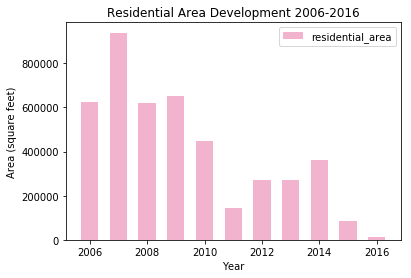

In [305]:
plt.bar(resident_area['YRBUILT'], resident_area['SHAPE_Area'], width=0.6, label='residential_area', color='#F2B3CE')
plt.ylabel('Area (square feet)')
plt.xlabel('Year')
plt.legend(loc="upper right")
plt.title('Residential Area Development 2006-2016')
plt.show()